In [3]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load("Data/fruits_300.npy")
fruits

# 11111~이 많이있다는건 배경색이 검정색이라는거

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [5]:
fruits.shape         # 이미지가 300장이고, 각 이미지당 가로100 세로100

(300, 100, 100)

<function matplotlib.pyplot.show(close=None, block=None)>

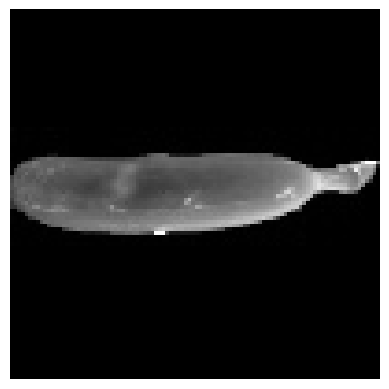

In [8]:
plt.imshow(fruits[200], cmap = "gray")
plt.axis("off")
plt.show

In [10]:
fruits2 = fruits.reshape(300, 10000)     # 100x100짜리를 가로로 쭉 펴겠다
fruits2.shape

(300, 10000)

In [11]:
apple = fruits2[:100]       #사과
pineapple = fruits2[100:200]  #파인애플
banana = fruits[200:]      #바나나 

In [17]:
apple_mean = apple.mean(axis = 0).reshape(100,100)            # 각 픽셀값들의 평균값 얻으려면 아랫방향으로 더해야한다
                                    # 가로로 쭉 폈던 걸 다시 100x100으로
pineapple_mean = pineapple.mean(axis = 0).reshape(100,100) 
banana_mean = banana.mean(axis = 0).reshape(100,100) 

<function matplotlib.pyplot.show(close=None, block=None)>

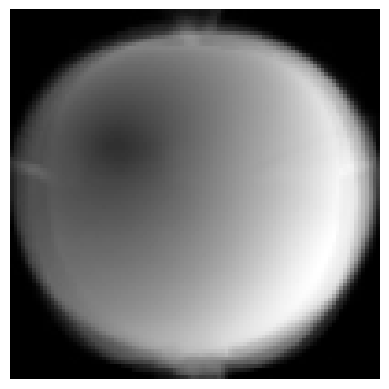

In [25]:
plt.imshow(apple_mean, cmap = "gray")
plt.axis("off")
plt.show        

# 세종류의 이미지를 다 겹친것처럼 나온다

# 섞여있는 사진에서 사과사진만 뽑아내려면?

In [31]:
# 픽셀값이 0에 가까운애들이 사과가 아닐까?
A = fruits - apple_mean             # 무작위값에서 사과를 뺀다
A2 = np.square(A).sum(axis = (1,2))      # 픽셀값 제곱을 구해서 가로길이,세로길이를 더한 값이 제일 작은 게 0에 가장 가까울것
                                                    # 사진에서 사과를 뺀 픽셀값?
idx = np.argsort(A2)[:100]     # 픽셀들의 정렬된 위치값을 보겠다
idx

array([ 12,  38,  30,  47,  76,  84,  66,  53,  24,  48,  69,  87,  33,
        27,  73,  70,  57,  68,  74,  86,   7,  54,  11,  90,  56,  61,
        31,  16,  98,   4,  78,  14,   1,  93,  59,   6,  49,  92,  40,
        23,  50,  32,  36,  71,  95,   8,  77,  10,   3,  65,   0,  94,
         2,  22,  80,  89,  97,  17,  96,  41,  39,  75,  35,  21,  55,
        43,  99,  28,  13,  64,  34,  82,  15,  25,  19,  67,  46,  58,
        79,  51,  60,  20,  37,  29,  83,  85,  81,   9,  45,  88,  26,
        63, 110, 120, 124,   5,  72, 192, 109, 102], dtype=int64)

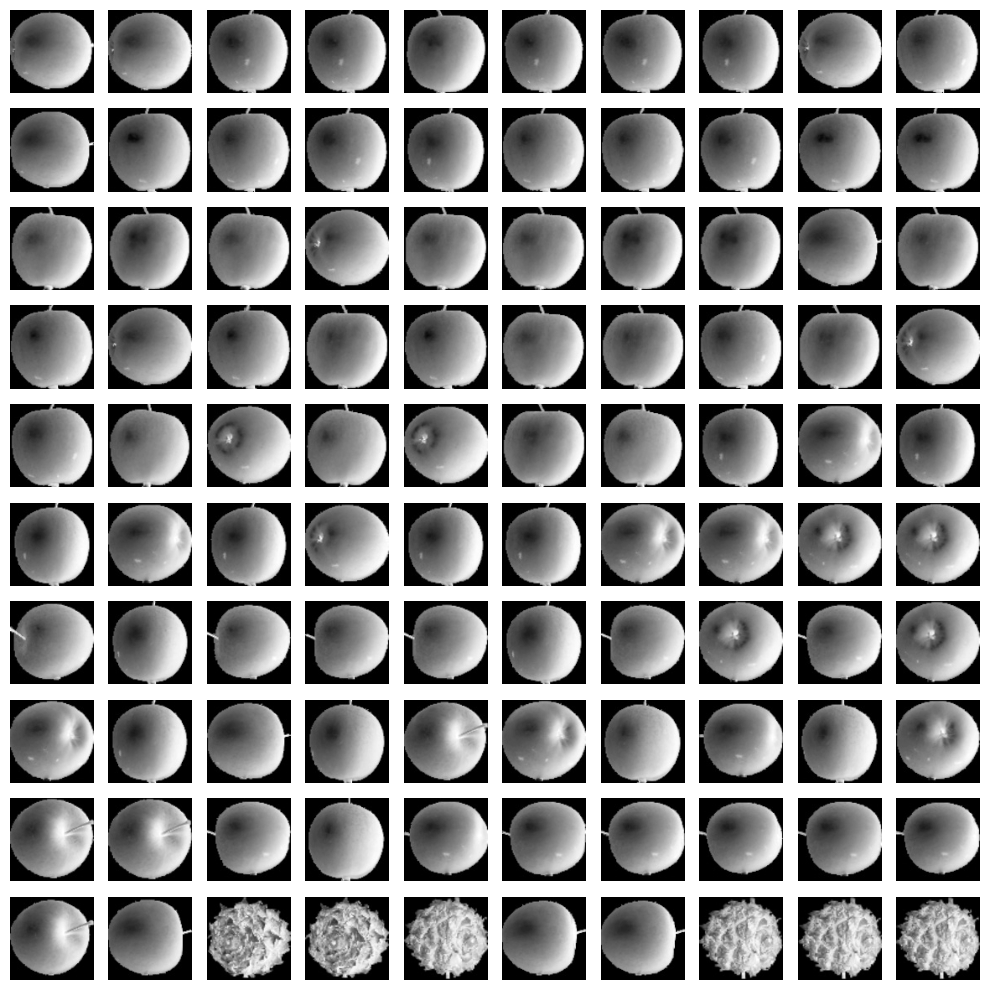

In [34]:
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
axs = axs.flatten()        # 10행10열을 일자로 쭉 피겠다

for i in range(100):
    ax = axs[i]
    image_index = idx[i]
    image = fruits[image_index]
    ax.imshow(image, cmap = "gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

# 바나나

In [35]:
# 픽셀값이 0에 가까운애들이 바나나가 아닐까?
A = fruits - banana_mean
A2 = np.square(A).sum(axis = (1,2))
idx = np.argsort(A2)[:100]  
idx

array([261, 208, 286, 212, 285, 290, 276, 264, 283, 203, 219, 200, 291,
       266, 252, 255, 201, 268, 284, 270, 265, 247, 256, 225, 281, 211,
       254, 269, 250, 280, 239, 299, 244, 246, 297, 205, 263, 287, 288,
       262, 224, 232, 279, 245, 218, 238, 275, 217, 295, 230, 253, 210,
       209, 241, 267, 207, 272, 220, 248, 289, 243, 258, 274, 249, 277,
       235, 233, 215, 228, 229, 282, 213, 240, 296, 294, 222, 206, 278,
       271, 259, 237, 202, 204, 227, 293, 216, 260, 236, 214, 292, 257,
       226, 221, 298, 223, 251, 242, 231, 168, 171], dtype=int64)

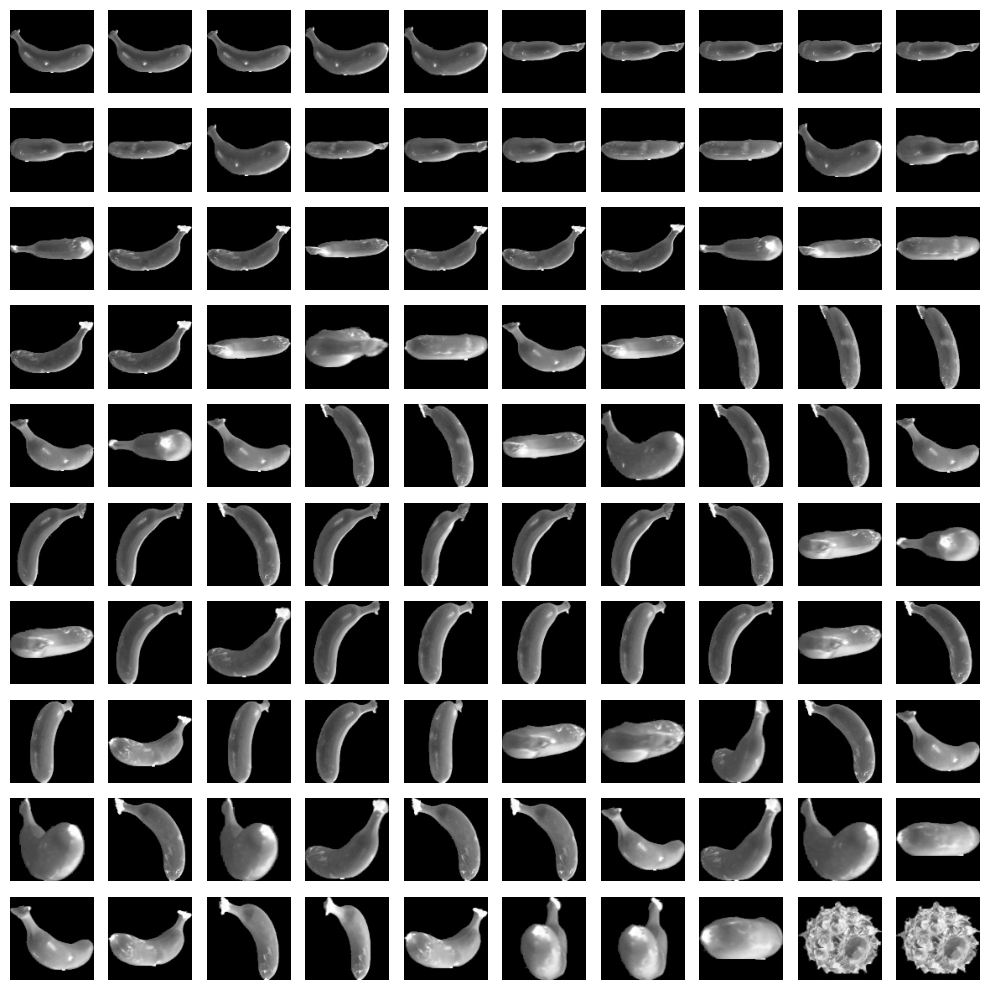

In [36]:
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
axs = axs.flatten()        # 10행10열을 일자로 쭉 피겠다

for i in range(100):
    ax = axs[i]
    image_index = idx[i]
    image = fruits[image_index]
    ax.imshow(image, cmap = "gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

# 라이브러리로 K-means

In [38]:
# 비지도학습 - K-Means

fruits = np.load("Data/fruits_300.npy")
fruits.shape

(300, 100, 100)

In [39]:
# sklearn : 문제집(2차원행렬)
fruits2 = fruits.reshape(300, 10000)
fruits2.shape            # 2차원행렬로 만들어줌

(300, 10000)

In [40]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

km.fit(fruits2)

KMeans(n_clusters=3)

In [41]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 과일의 종류가 몇 종류인지 모를 때

군집수에 따라 제곱합의 총합이 다르게 나타날것...제곱합의 총합 그래프가 가장 많이 꺾인 곳이 최적의 군집수

In [44]:
box = []
for n in range(2, 7):
    km = KMeans(n_clusters = n)
    km.fit(fruits2)
    box.append(km.inertia_)

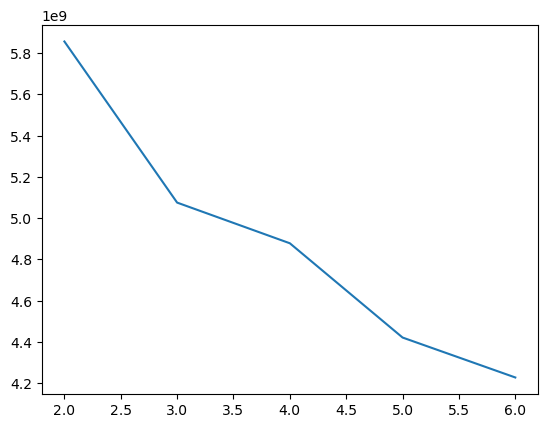

In [45]:
plt.plot(range(2, 7), box)
plt.show()